In [4]:
# gerando função geradora da série ar1 e ar2
import numpy as np

def ar1(phi1, termo_erro, tempo):
    x = np.zeros(tempo)
    erro = np.random.normal(0, termo_erro, tempo)

    for t in range(tempo):
        x[t] = phi1 * x[t-1] + erro[t]

    return x

In [5]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme_minimal


def plot_series(serie, title="Simulação"):

    df = pd.DataFrame({
    "tempo": range(len(serie)),
    "valor": serie
    })

    p = (
        ggplot(df, aes("tempo", "valor"))
        + geom_line(color="#2C3E50")
        + labs(title=title, x="Período", y="Valor")
        + theme_minimal()
    )

    p.show()

In [6]:
phi1 = 0
serie = ar1(phi1, 0.10, 10000)

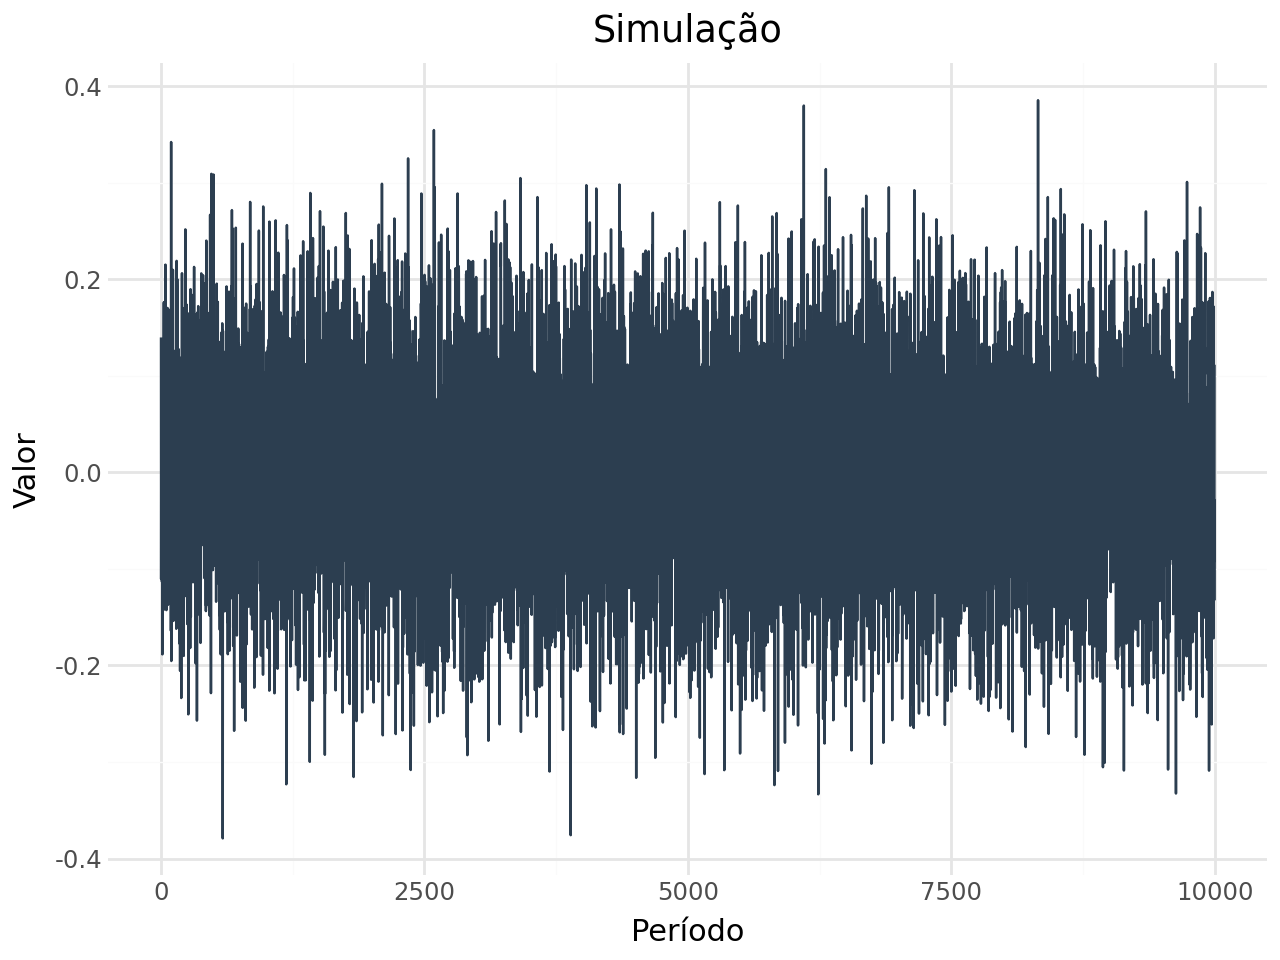

In [7]:
# temos uma série estacionaria com phi1 = 0 e 1000 observações
plot_series(serie)

In [8]:
# dicky fuller
import statsmodels.api as sm

def dickey_fuller_simples(serie):
    serie = np.asarray(serie)
    
    # Cria Δy_t
    dy = np.diff(serie)

    # Cria y_{t-1}
    y_lag = serie[:-1]

    # Regressão: Δy_t = α + β y_{t-1}
    y_lag = sm.add_constant(y_lag)
    modelo = sm.OLS(dy, y_lag).fit()

    print(modelo.summary())
    print("\nEstatística DF simples (t-test para β):", modelo.tvalues[1])
    print("p-valor associado:", modelo.pvalues[1])
    return modelo

In [9]:
dickey_fuller_simples(serie)
# nesse caso rejeitamos H0 então a série é estacionária

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:00:40   Log-Likelihood:                 8765.8
No. Observations:                9999   AIC:                        -1.753e+04
Df Residuals:                    9997   BIC:                        -1.751e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.431      0.6

In [ ]:
# kpss
from statsmodels.tsa.stattools import kpss

# x é sua série temporal (lista, array ou pandas Series)
stat, p, lags, crit = kpss(serie, regression='c')  # 'c' = level, 'ct' = trend

print('Estatística:', stat)
print('p-valor:', p)
print('Lags usados:', lags)
print('Critérios:', crit)

# nesse caso não rejeitamos a hipótese nula (H0) então a série é estacionária, o que é comprovado pelo phi1 ser igual a 0 em uma série AR1

Estatística: 1.1759215860970618
p-valor: 0.01
Lags usados: 18
Critérios: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12464\3153813447.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.



In [ ]:
# phillips-perron
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(serie)
print(pp.summary())
# nesse caso como rejeitamos H0 então a série é estacionária

     Phillips-Perron Test (Z-tau)    
Test Statistic               -101.743
P-value                         0.000
Lags                               38
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import ADF

adf = ADF(serie, trend="c")  # lags=None faz seleção automática
print(adf.summary())

# nesse caso rejeitamos também H0 logo é estacionária

   Augmented Dickey-Fuller Results   
Test Statistic               -101.651
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


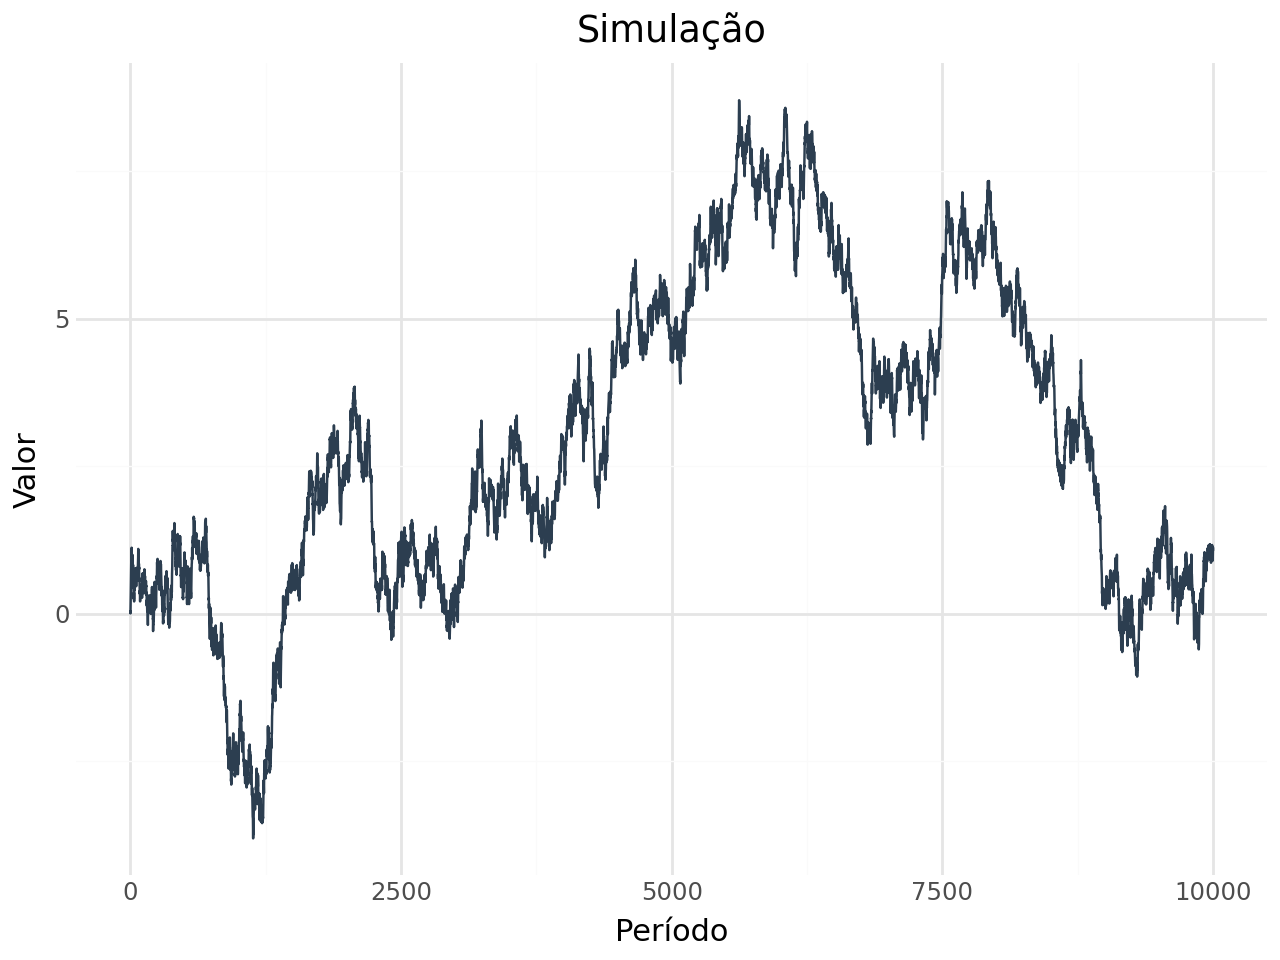

In [17]:
# agora vamos pegar uma série não estacionária e defasar para ela se tornar estacionária, nesse caso vamos usar a função com phi1 = 1

serie_n = ar1(1, 0.1, 10000)
plot_series(serie_n)

In [ ]:
# comprovando não estacionariedade
pp = PhillipsPerron(serie_n)
print(pp.summary())

# nesse caso não é mesmo, não rejeitamos H0 que diz que não é estacionária para esse teste

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.861
P-value                         0.351
Lags                               38
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
# gerando série defasada em uma unidade por ser AR(1)
dy = np.diff(serie_n)
dy

array([-0.05707833,  0.09313447,  0.07118643, ...,  0.14859754,
        0.02981342, -0.05735104], shape=(9999,))

In [ ]:
# agora vamos testar se é estacionária com todos os testes

# kpss
stat, p, lags, crit = kpss(dy, regression='c')

print('Estatística:', stat)
print('p-valor:', p)
print('Lags usados:', lags)
print('Critérios:', crit)

# não rejeitamos, logo é estacionária (esse teste é o único que muda as hipóteses)

Estatística: 0.12255592200565171
p-valor: 0.1
Lags usados: 7
Critérios: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12464\53228263.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



In [ ]:
# adf
adf = ADF(dy, trend="c")  # lags=None faz seleção automática
print(adf.summary())

# rejeitamos, logo é estacionária

   Augmented Dickey-Fuller Results   
Test Statistic                -99.571
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [24]:
# phillips-perron
pp = PhillipsPerron(dy)
print(pp.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -99.800
P-value                         0.000
Lags                               38
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


portanto todos os testes funcionaram, e nesse caso, a série defasada que não era estacionária se tornou estacionária